In [198]:
import networkx as nx
import re
import numpy as np
from timeit import default_timer as timer

In [12]:
def get_input(name):
    with open(f'{name}.txt') as f:
        return f.read().split('\n')

In [215]:
x = get_input('input')

In [ ]:
x

# Part 1

In [217]:
G = nx.empty_graph()
flow_rates = dict()
for valve in x:
    v = valve[6:8]
    flow = int(re.findall('rate=(.*);', valve)[0])
    flow_rates.update({v: flow})
    G.add_node(v)
    
    
    neighbors = re.findall('valve[s]? (.*)', valve)[0].split(', ')
    for n in neighbors:
        G.add_edge(v, n)

In [218]:
nx.set_node_attributes(G, flow_rates, 'flow')

In [219]:
pos = nx.spring_layout(G)

In [220]:
pos['AA']=np.array([-0.5,  -0.5])

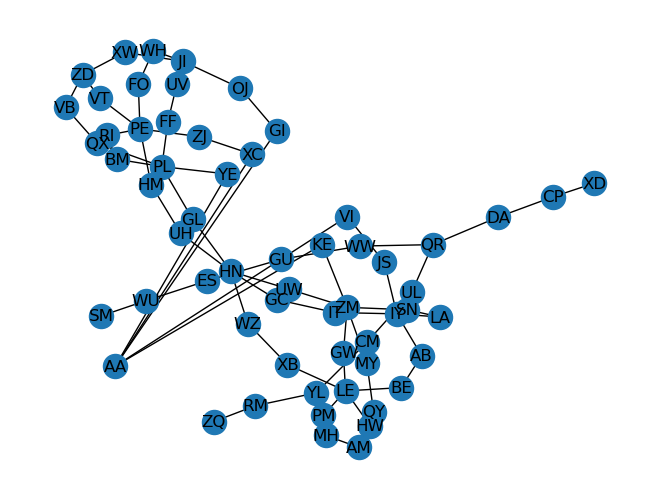

In [221]:
nx.draw(G, pos=pos, with_labels=True)

In [222]:
# nx.dijkstra_path_length(G, 'AA', 'HH')

In [223]:
# H = nx.DiGraph()
# for origin_node in G.nodes():
#     H.add_node(origin_node)
#     for destination_node in G.nodes():
#         if origin_node == destination_node:
#             continue
#         H.add_edge(origin_node, destination_node, 
#                    cost=nx.dijkstra_path_length(G, origin_node, destination_node)+1,
#                    reward=flow_rates[destination_node] )

In [224]:
H = nx.DiGraph()
for origin_node in G.nodes():
    if (origin_node != 'AA') and not flow_rates[origin_node]:
        continue
    H.add_node(origin_node)
    for destination_node in G.nodes():
        if origin_node == destination_node:
            continue
        if not flow_rates[destination_node]:
            continue
        H.add_edge(origin_node, destination_node, 
                   cost=nx.dijkstra_path_length(G, origin_node, destination_node)+1,
                   reward=flow_rates[destination_node] )

In [225]:
from networkx.classes.function import path_weight

In [226]:
def path_reward(G, path, cost_field, reward_field):
    cost = 0
    reward = 0
    if not nx.is_path(G, path):
        raise nx.NetworkXNoPath("path does not exist")
    for node, nbr in nx.utils.pairwise(path):
        cost += G[node][nbr][cost_field]
        reward += (30 - cost)*G[node][nbr][reward_field]
    return reward

In [227]:
# path_reward(H, ['AA', 'DD', 'BB', 'JJ', 'HH', 'EE', 'CC'], cost_field='cost', reward_field='reward')

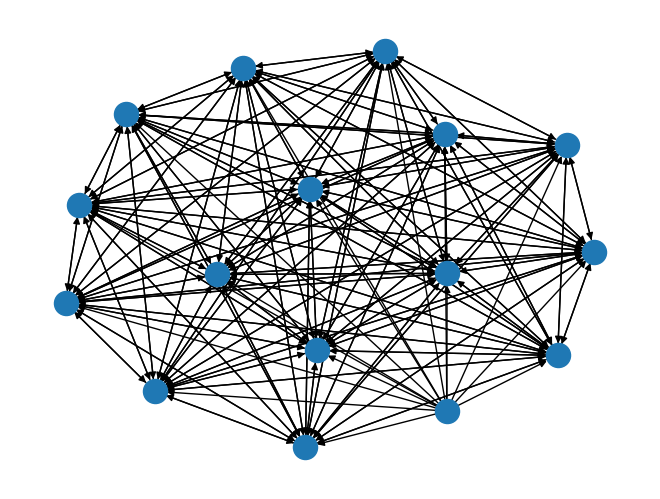

In [228]:
nx.draw(H)

In [229]:
def find_best_path(G, path):
    if (unchecked_neighbors := [node for node in nx.neighbors(G, path[-1]) if node not in path]):
        return max([find_best_path(G, path+[node]) for node in unchecked_neighbors])
    else:
        return path_reward(H, path, cost_field='cost', reward_field='reward')

In [ ]:
t0 = timer()
bp = find_best_path(H, ['AA'])
print(f'best path pressure: {bp}, time: {(timer()-t0)/60:.2f} min')

In [178]:
nodes_with_flow = [n for n in flow_rates.keys() if flow_rates[n]]
max_reward = 0
for p in itertools.permutations(nodes_with_flow):
    max_reward = max(max_reward, path_reward(H, ('AA',)+p, cost_field='cost', reward_field='reward'))
max_reward

1651

# Part 2